In [1]:
!pip install numpy pandas tensorflow matplotlib opencv-python


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


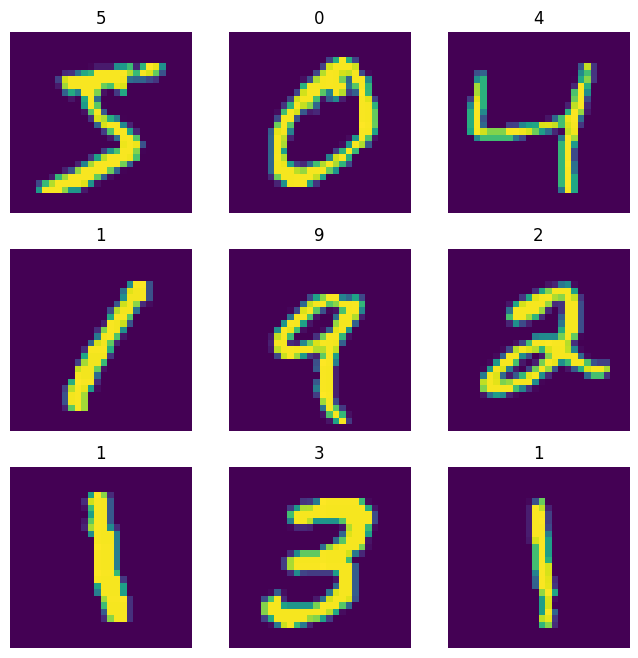

In [6]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

In [7]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Input layer
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer with ReLU
model.add(tf.keras.layers.Dropout(0.2))  # Dropout with rate 0.2
model.add(tf.keras.layers.Dense(32, activation='relu'))  # Another Dense layer
model.add(tf.keras.layers.Dropout(0.2))  # Dropout with rate 0.2
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8036 - loss: 0.6530 - val_accuracy: 0.9554 - val_loss: 0.1438
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9456 - loss: 0.1909 - val_accuracy: 0.9652 - val_loss: 0.1145
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9586 - loss: 0.1440 - val_accuracy: 0.9721 - val_loss: 0.0932
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9618 - loss: 0.1253 - val_accuracy: 0.9748 - val_loss: 0.0853
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9689 - loss: 0.1053 - val_accuracy: 0.9772 - val_loss: 0.0803
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9705 - loss: 0.1017 - val_accuracy: 0.9754 - val_loss: 0.0866
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9734 - loss: 0.0867 - val_accuracy: 0.9795 - val_loss: 0.0733
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9750 - loss: 0.085

In [11]:
model.save('/content/hand_written_digit_recognition_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


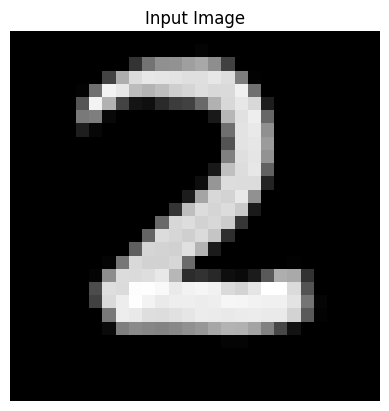

Predicted Digit: 2


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/content/hand_written_digit_recognition_model.keras')

# Input image name
img_name = "2.png"  # Replace with the actual image name
image_path = f"/content/images/{img_name}"  # Updated directory path for images

if os.path.exists(image_path):
    # Read the image (simulating your original approach)
    image = cv2.imread(image_path)[:, :, 0]  # Load as a 2D array, taking only the first channel
    image = np.invert(np.array([image]))  # Invert the image and add a batch dimension

    # Predict the digit
    output = model.predict(image)

    # Plot the image for visualization
    plt.imshow(image[0], cmap='gray')  # Remove the batch dimension for visualization
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Print the predicted digit
    print("Predicted Digit:", np.argmax(output))
else:
    print(f"Error: The image '{img_name}' does not exist in '/content/images'.")


In [13]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [14]:
!pip install pyngrok



In [15]:
from pyngrok import ngrok


In [16]:
!ngrok authtoken 2idqNS37zRV2XDajxEFWqqu5LMf_6om6saR32Nec664Ys8S4k


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [17]:
!pip install streamlit pyngrok tensorflow opencv-python-headless


In [18]:
!pip install streamlit-drawable-canvas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.4 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Authenticate ngrok
!ngrok authtoken 2idqNS37zRV2XDajxEFWqqu5LMf_6om6saR32Nec664Ys8S4k

# Start ngrok tunnel
public_url = ngrok.connect(8501, "http")
print(f"Streamlit is running at {public_url}")

# Run Streamlit app
!streamlit run app.py &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit is running at NgrokTunnel: "https://47a5-34-42-164-72.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.164.72:8501

2024-12-18 19:13:03.681436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-18 19:13:03.715587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-18 19:13:03.724912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 19: